In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
zoo = pd.read_csv('/home/sushil/Documents/Assingment/KNN-13/Zoo.csv')

In [4]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
zoo.shape

(101, 18)

In [5]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
zoo['animal name'].unique

<bound method Series.unique of 0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object>

In [8]:
zoo['animal name'].nunique()

100

In [10]:
zoo['animal name'].value_counts()

frog        2
duck        1
aardvark    1
swan        1
rhea        1
           ..
platypus    1
vampire     1
dogfish     1
mink        1
gull        1
Name: animal name, Length: 100, dtype: int64

<AxesSubplot:xlabel='animal name', ylabel='count'>

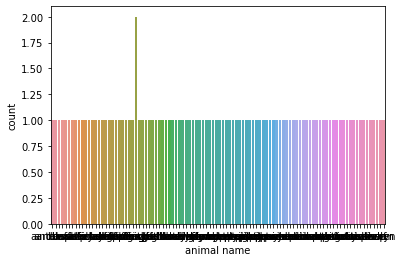

In [89]:
sns.countplot(zoo['animal name'])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train,test = train_test_split(zoo,test_size=0.2)

In [14]:
train.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
68,pussycat,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
60,pike,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4


In [15]:
train.shape

(80, 18)

In [16]:
test.shape

(21, 18)

In [18]:
from sklearn.neighbors import KNeighborsClassifier as knc

In [20]:
neigh = knc(n_neighbors = 3)

In [21]:
neigh

KNeighborsClassifier(n_neighbors=3)

In [25]:
neigh.fit(train.iloc[:,2:17],train.iloc[:,17])

KNeighborsClassifier(n_neighbors=3)

In [28]:
train_acc = np.mean(neigh.predict(train.iloc[:,2:17])==train.iloc[:,17])

In [30]:
train_acc

0.95

In [31]:
test_acc = np.mean(neigh.predict(test.iloc[:,2:17])==test.iloc[:,17])

In [32]:
test_acc

1.0

In [33]:
neigh1 = knc(n_neighbors = 5)

In [34]:
neigh1.fit(train.iloc[:,2:17],train.iloc[:,17])

KNeighborsClassifier()

In [35]:
train_acc1 = np.mean(neigh1.predict(train.iloc[:,2:17])==train.iloc[:,17])

In [36]:
train_acc1

0.9125

In [37]:
test_acc1 = np.mean(neigh1.predict(test.iloc[:,2:17])==test.iloc[:,17])

In [38]:
test_acc1

0.8095238095238095

In [39]:
neigh2 = knc(n_neighbors = 7)

In [40]:
neigh2.fit(train.iloc[:,2:17],train.iloc[:,17])

KNeighborsClassifier(n_neighbors=7)

In [43]:
train_acc2 = np.mean(neigh2.predict(train.iloc[:,2:17])==train.iloc[:,17])

In [44]:
train_acc2

0.85

In [45]:
test_acc2 = np.mean(neigh2.predict(test.iloc[:,2:17])==test.iloc[:,17])

In [46]:
test_acc2

0.7142857142857143

In [50]:
train1,test1 = train_test_split(zoo,test_size=0.4)

In [51]:
train1.shape

(60, 18)

In [53]:
test1.shape

(41, 18)

In [54]:
neigh3 = knc(n_neighbors = 3)

In [55]:
neigh3.fit(train1.iloc[:,2:17],train1.iloc[:,17])

KNeighborsClassifier(n_neighbors=3)

In [56]:
train_acc3 = np.mean(neigh3.predict(train1.iloc[:,2:17])==train1.iloc[:,17])

In [57]:
train_acc3

0.95

In [58]:
test_acc3 = np.mean(neigh3.predict(test1.iloc[:,2:17])==test1.iloc[:,17])

In [59]:
test_acc3

0.8780487804878049

In [60]:
neigh4 = knc(n_neighbors = 5)

In [61]:
neigh4.fit(train1.iloc[:,2:17],train1.iloc[:,17])

KNeighborsClassifier()

In [62]:
train_acc4 = np.mean(neigh4.predict(train1.iloc[:,2:17])==train1.iloc[:,17])

In [63]:
train_acc4

0.8166666666666667

In [65]:
test_acc4 = np.mean(neigh4.predict(test1.iloc[:,2:17])==test1.iloc[:,17])

In [66]:
test_acc4

0.7317073170731707

In [68]:
acc = []
for i in range(3,50,2):
    neigh = knc(n_neighbors = i)
    neigh.fit(train.iloc[:,2:17],train.iloc[:,17])
    train_acc = np.mean(neigh.predict(train.iloc[:,2:17])==train.iloc[:,17])
    test_acc = np.mean(neigh.predict(test.iloc[:,2:17])==test.iloc[:,17])
    acc.append([train_acc,test_acc])

In [69]:
acc

[[0.9666666666666667, 0.9024390243902439],
 [0.8833333333333333, 0.9024390243902439],
 [0.8166666666666667, 0.8292682926829268],
 [0.7333333333333333, 0.8048780487804879],
 [0.7333333333333333, 0.8048780487804879],
 [0.75, 0.8292682926829268],
 [0.75, 0.8292682926829268],
 [0.75, 0.8292682926829268],
 [0.65, 0.7073170731707317],
 [0.6, 0.6341463414634146],
 [0.5666666666666667, 0.5121951219512195],
 [0.45, 0.36585365853658536],
 [0.45, 0.36585365853658536],
 [0.48333333333333334, 0.3902439024390244],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536]]

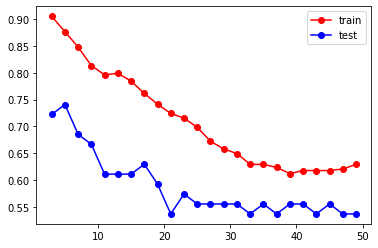

In [147]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc],"ro-")
plt.plot(np.arange(3,50,2),[i[1] for i in acc],"bo-")
plt.legend(['train','test'])

In [73]:
acc1 = []
for i in range(3,50,2):
    neigh1 = knc(n_neighbors = i)
    neigh1.fit(train1.iloc[:,2:17],train1.iloc[:,17])
    train_acc1 = np.mean(neigh1.predict(train1.iloc[:,2:17])==train1.iloc[:,17])
    test_acc1 = np.mean(neigh1.predict(test1.iloc[:,2:17])==test1.iloc[:,17])
    acc1.append([train_acc1,test_acc1])

In [74]:
acc1

[[0.95, 0.8780487804878049],
 [0.8166666666666667, 0.7317073170731707],
 [0.8166666666666667, 0.7317073170731707],
 [0.7833333333333333, 0.7317073170731707],
 [0.8166666666666667, 0.7317073170731707],
 [0.8166666666666667, 0.7317073170731707],
 [0.75, 0.6341463414634146],
 [0.75, 0.6341463414634146],
 [0.7833333333333333, 0.6585365853658537],
 [0.6666666666666666, 0.5365853658536586],
 [0.6666666666666666, 0.5121951219512195],
 [0.6333333333333333, 0.4878048780487805],
 [0.6333333333333333, 0.4878048780487805],
 [0.6333333333333333, 0.4878048780487805],
 [0.6166666666666667, 0.4634146341463415],
 [0.5833333333333334, 0.4634146341463415],
 [0.48333333333333334, 0.36585365853658536],
 [0.45, 0.36585365853658536],
 [0.48333333333333334, 0.3902439024390244],
 [0.4666666666666667, 0.3902439024390244],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536],
 [0.43333333333333335, 0.36585365853658536]]

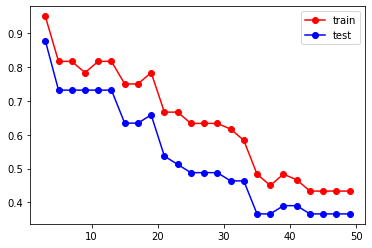

In [146]:
plt.plot(np.arange(3,50,2),[i[0] for i in acc1],"ro-")
plt.plot(np.arange(3,50,2),[i[1] for i in acc1],"bo-")
plt.legend(['train','test'])

In [78]:
from sklearn.metrics import classification_report

In [79]:
classification_report(train.iloc[:,17],neigh.predict(train.iloc[:,2:17]))

/home/sushil/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.43      1.00      0.60        26\n           2       0.00      0.00      0.00         8\n           3       0.00      0.00      0.00         4\n           4       0.00      0.00      0.00         7\n           5       0.00      0.00      0.00         1\n           6       0.00      0.00      0.00         6\n           7       0.00      0.00      0.00         8\n\n    accuracy                           0.43        60\n   macro avg       0.06      0.14      0.09        60\nweighted avg       0.19      0.43      0.26        60\n'

In [80]:
classification_report(train1.iloc[:,17],neigh1.predict(train1.iloc[:,2:17]))

/home/sushil/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.43      1.00      0.60        26\n           2       0.00      0.00      0.00        14\n           3       0.00      0.00      0.00         4\n           4       0.00      0.00      0.00         7\n           5       0.00      0.00      0.00         2\n           6       0.00      0.00      0.00         4\n           7       0.00      0.00      0.00         3\n\n    accuracy                           0.43        60\n   macro avg       0.06      0.14      0.09        60\nweighted avg       0.19      0.43      0.26        60\n'